In [1]:
import tweepy
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

consumer_key = "E94DFtes8j5myDibhj4sfs0NA"
consumer_secret = "f02atPbdvNHpaOyo5CzfKKDQidqY3JPdSDxTVEuL9Oi220RaZh"
access_token = "358155084-9hyegtGt2qSXTw3OYa5vOdR27Zx9BECK40Z1QWay"
access_token_secret = "qh8kdCttP4ciVAdYMU70NQmw9oFzapA6f5U3OCtgTg9W3"

auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
# api = tweepy.API(auth)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [2]:
def cekMasyarakat(kalimat):
    search_words = kalimat
    date_since = "2020-07-27"
    new_search = search_words + " -filter:retweets"

    tweets = tweepy.Cursor(api.search,
            q=new_search,
            lang="id",
            since=date_since).items(1000)
    
    items = []
    for tweet in tweets:
        item = []
        item.append (' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet.text).split()))
        items.append(item)
    hasil = pd.DataFrame(data=items, columns=['tweet'])
    
    pos_list= open("D:/TELKOM UNIVERSITY/Course IT/SANBERCODE/DATA SCIENCE LANJUTAN/WEEK 2/kata_positif.txt","r")
    pos_kata = pos_list.readlines()
    neg_list= open("D:/TELKOM UNIVERSITY/Course IT/SANBERCODE/DATA SCIENCE LANJUTAN/WEEK 2/kata_negatif.txt","r")
    neg_kata = neg_list.readlines()

    
    S = []
    for item in items:
            count_p = 0
            count_n = 0
            for kata_pos in pos_kata:
                if kata_pos.strip() in item[0]:
                    count_p +=1
            for kata_neg in neg_kata:
                if kata_neg.strip() in item[0]:
                    count_n +=1
            S.append(count_p - count_n)

    hasil["value"] = S
    print ("Nilai rata-rata: "+str(np.mean(hasil["value"])))
    print ("Standar deviasi: "+str(np.std(hasil["value"])))
    
    labels, counts = np.unique(hasil["value"], return_counts=True)
    plt.bar(labels, counts, align='center')
    plt.gca().set_xticks(labels)
    plt.show()

Nilai rata-rata: -0.486
Standar deviasi: 1.5804442413448214


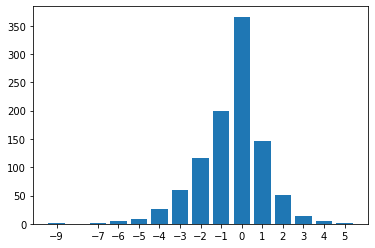

In [3]:
no1 = cekMasyarakat("jouska")
no1

Nilai rata-rata: -0.7458333333333333
Standar deviasi: 1.8769388124165283


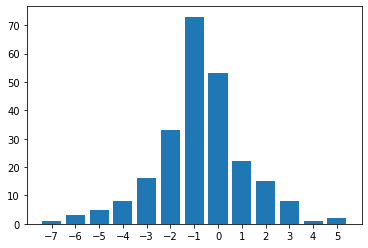

In [4]:
no2 = cekMasyarakat("Anies Baswedan OR Gubernur Jakarta")
no2

Nilai rata-rata: 0.5789473684210527
Standar deviasi: 1.4979209969218639


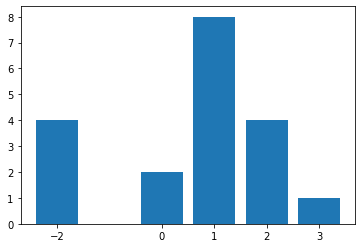

In [5]:
no3 = cekMasyarakat("Terawan Agus Putranto OR Menteri Kesehatan")
no3